In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
def vectorized_euclidean_distance(x, X_train): # we can use Manhattan distance depending on the problem
    
    diff = X_train - x.reshape(1, -1)
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

In [4]:
class KNN:
    def __init__(self, k = 3):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    def _predict(self, x):
        distances = vectorized_euclidean_distance(x, self.X_train)
        k_idx = np.argsort(distances)[:self.k] # returns the indices that would sort the array
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [5]:
iris = datasets.load_iris()
X, y = iris.data, iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [6]:
import seaborn as sns
import pandas as pd
# some visualizations of the iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
print(iris_df.head())
print(iris_df.shape)
print(iris_df['species'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
(150, 5)
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


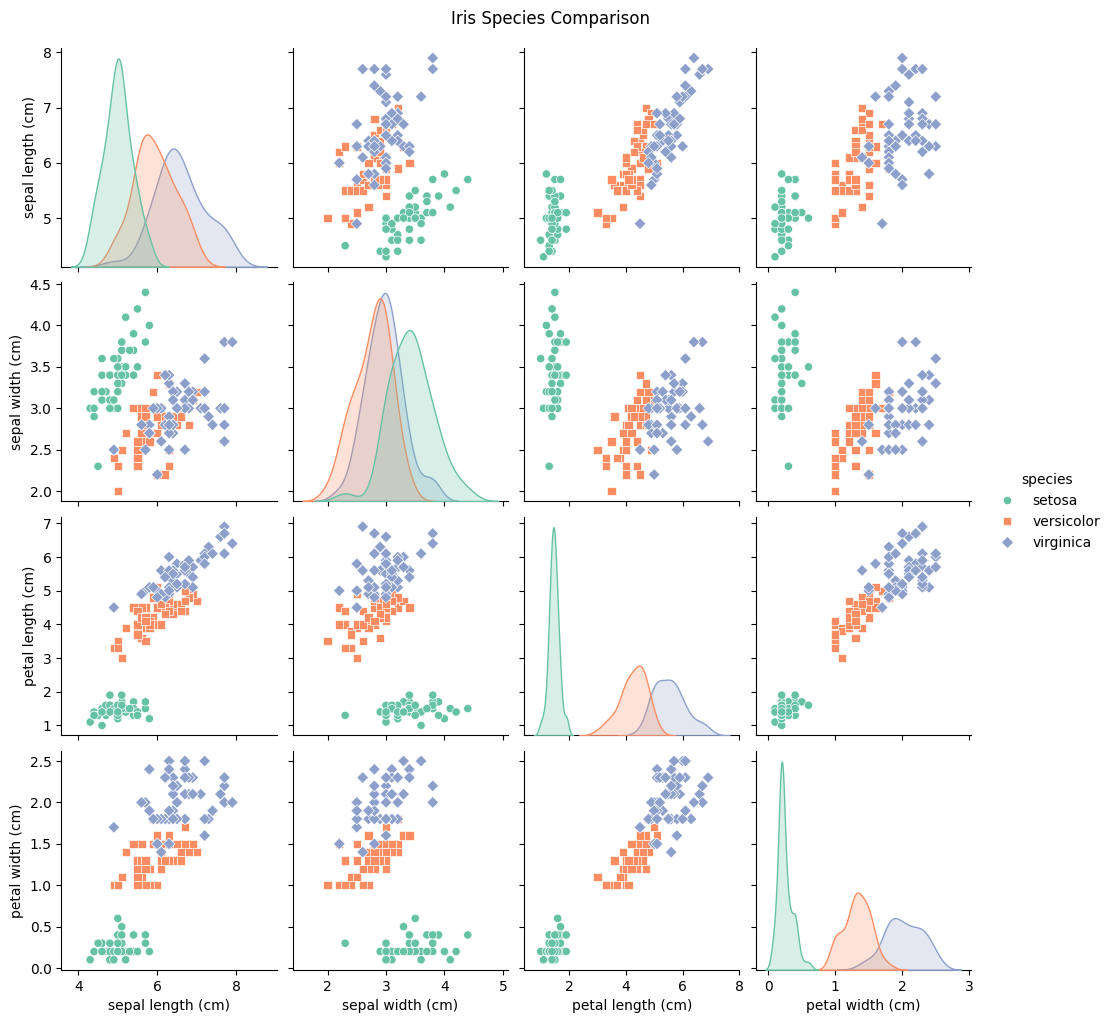

In [87]:


pairplot = sns.pairplot(iris_df, hue="species", markrs=["o", "s", "D"], palette="Set2")
pairplot.fig.suptitle("Iris Species Comparison", y=1.02)
plt.show()

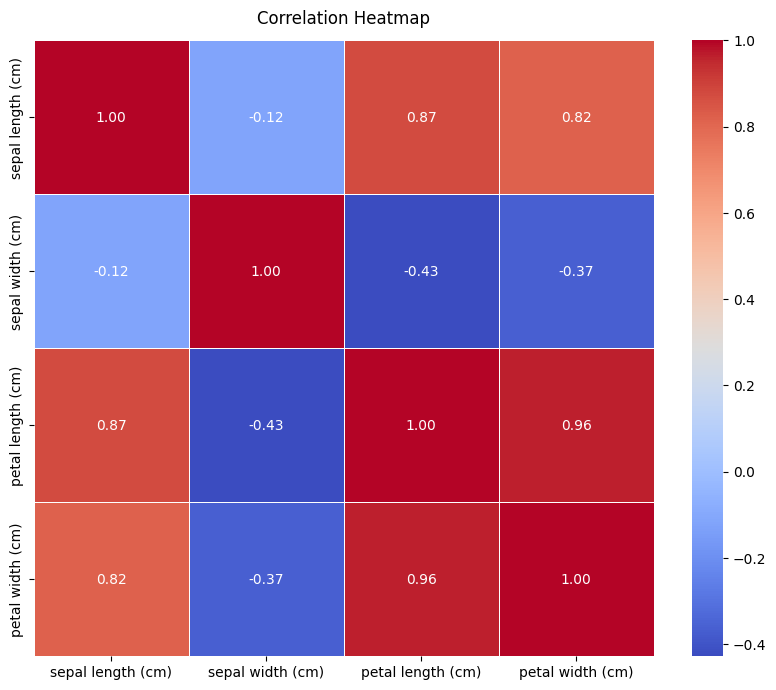

In [8]:
corr = iris_df.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()


In [9]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [10]:
k = 3 # for k = 5, 6, .. etc gives score of 0.96, 3,4 give 1.0 , hence around 3 is optimumm k value
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))


KNN classification accuracy 1.0


In [11]:
# now with feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin # so that model inherits from these classes, and we can use cross_val_score from scikit_learn

class KNN2(BaseEstimator, ClassifierMixin):
    def __init__(self, k = 3):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    def _predict(self, x):
        distances = vectorized_euclidean_distance(x, self.X_train)
        k_idx = np.argsort(distances)[:self.k] # returns the indices that would sort the array
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [13]:

from sklearn.model_selection import cross_val_score


accuracy_scores = []
for k in range(1, 21):
    knn = KNN2(k=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Best k: {best_k}")

Best k: 3
